<a href="https://colab.research.google.com/github/Nazneen-akram/NED-Data-Science-Artificial-Intelligence/blob/main/chapter04_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [5]:
word_index = reuters.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):  #sample axis
        for j in sequence:  # sequence axis (all encoded numbers)
            results[i, j] = 1.    # e.g. if sample=0, and 1st number in sequence=5, then results[0,5]=1.

    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [11]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

builtin method for 0ne-hot encoding

In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [13]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Building your model

**Model definition**

In [14]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [15]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [17]:
import datetime
import tensorflow as tf

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[tensorboard_callback])

Epoch 1/100
16/16 [==============================] - 8s 80ms/step - loss: 2.6048 - accuracy: 0.5115 - val_loss: 1.7163 - val_accuracy: 0.6190
Epoch 2/100
16/16 [==============================] - 1s 50ms/step - loss: 1.4784 - accuracy: 0.6739 - val_loss: 1.3412 - val_accuracy: 0.7120
Epoch 3/100
16/16 [==============================] - 1s 46ms/step - loss: 1.1472 - accuracy: 0.7538 - val_loss: 1.1813 - val_accuracy: 0.7200
Epoch 4/100
16/16 [==============================] - 1s 53ms/step - loss: 0.9425 - accuracy: 0.7968 - val_loss: 1.0642 - val_accuracy: 0.7720
Epoch 5/100
16/16 [==============================] - 1s 44ms/step - loss: 0.7817 - accuracy: 0.8349 - val_loss: 0.9903 - val_accuracy: 0.7860
Epoch 6/100
16/16 [==============================] - 1s 74ms/step - loss: 0.6572 - accuracy: 0.8583 - val_loss: 0.9421 - val_accuracy: 0.7920
Epoch 7/100
16/16 [==============================] - 1s 87ms/step - loss: 0.5496 - accuracy: 0.8800 - val_loss: 0.9018 - val_accuracy: 0.8110
Epoch 

**Plotting the training and validation loss**

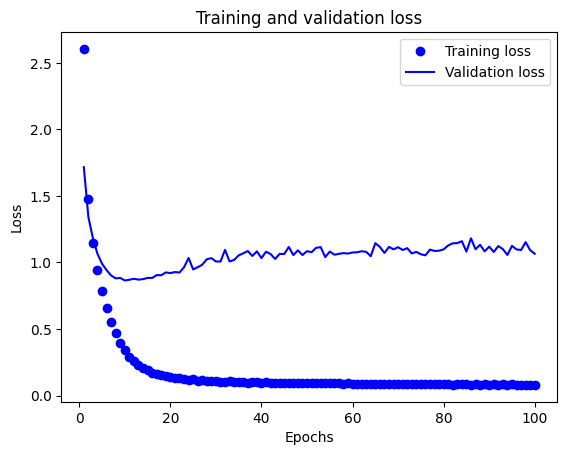

In [19]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

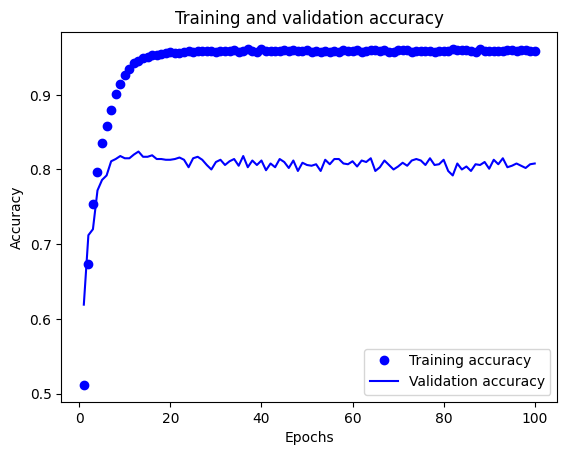

In [20]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [21]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
accuracy = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 15ms/step - loss: 2.5472 - accuracy: 0.4978
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.4514 - accuracy: 0.6787
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.1180 - accuracy: 0.7575
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.9139 - accuracy: 0.8016
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7606 - accuracy: 0.8342
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6332 - accuracy: 0.8653
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5295 - accuracy: 0.8854
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.4482 - accuracy: 0.9053
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9222 - accuracy: 0.7858


In [22]:
accuracy

[0.9221895933151245, 0.7858415246009827]

In [23]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18788958147818344

### Generating predictions on new data

decoding function

In [24]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

def decode_review(encoded_review):
    decoding = " ".join(
        [reverse_word_index.get(i - 3, "?") for i in encoded_review]
        )

    return decoding

In [25]:
decode_review(test_data[1])

"? philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration ? chairman ? yulo said yulo told reuters a survey during the current milling season which ends next month showed the 1986 87 estimate would almost certainly be met he said at least 1 2 mln tonnes of the 1987 88 crop would be earmarked for domestic consumption yulo said about 130 000 tonnes would be set aside for the u s sugar quota 150 000 tonnes for strategic reserves and 50 000 tonnes would be sold on the world market he said if the government approved a long standing ? recommendation to manufacture ethanol the project would take up another 150 000 tonnes slightly raising the target the government for its own reasons has been delaying approval of the project but we expect it to come through by july yulo said ethanol could make up five pct of gasoline cutting the oil import bill by about 300 mln pesos yulo s

In [26]:
test_labels[1]

10

In [27]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [28]:
predictions[0].shape

(46,)

In [29]:
np.sum(predictions[0])

1.0000001

In [30]:
np.argmax(predictions[1])

10

In [31]:
for idx in range(len(test_data[:20])):
    enc_data = test_data[idx]
    label = test_labels[idx]
    pred = np.argmax(predictions[idx])
    text = decode_review(enc_data)

    print(f"{label}, {pred}", text)


3, 4 ? the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to ? growth and expansion plans for ? inc and ? inc over the next two years a and p said the acquisition of ? in august 1986 and ? in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt ? ? of west germany reuter 3
10, 10 ? philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration ? chairman ? yulo said yulo told reuters a survey during the current milling season which ends next month

### A different way to handle the labels and the loss

In [32]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [33]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [34]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 13ms/step - loss: 3.3398 - accuracy: 0.1997 - val_loss: 2.8755 - val_accuracy: 0.3120
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 2.5439 - accuracy: 0.3031 - val_loss: 2.2764 - val_accuracy: 0.3240
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.8764 - accuracy: 0.4260 - val_loss: 1.5801 - val_accuracy: 0.6650
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.2817 - accuracy: 0.7134 - val_loss: 1.2799 - val_accuracy: 0.7250
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0656 - accuracy: 0.7533 - val_loss: 1.2281 - val_accuracy: 0.7150
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9587 - accuracy: 0.7699 - val_loss: 1.2059 - val_accuracy: 0.7270
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8841 - accuracy: 0.7828 - val_loss: 1.2043 - val_accuracy: 0.7290
Epoch 8/20
63/63 [=

### Further experiments